<a href="https://colab.research.google.com/github/Helzheng123/datasci_5_statistics/blob/main/datasci_5_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [285]:
import pandas as pd
import re
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [286]:
# Read Data
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [287]:
# Cleaning columns for dataset #1

def clean_column(df):
  def clean_name(name):
        cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', name)
        return cleaned_name.lower()

  df.columns = [clean_name(col) for col in df.columns]
  return df

clean_df = clean_column(df)
clean_df

,personid,gender,age,occupation,sleepduration,qualityofsleep,physicalactivitylevel,stresslevel,bmicategory,bloodpressure,heartrate,dailysteps,sleepdisorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [288]:
new_df = clean_df.rename(columns = {'sleepduration' : 'sleep_duration', 'qualityofsleep' : 'quality_of_sleep', 'physicalactivitylevel' : 'physical_activity_level', 'bmicategory' : 'bmi_category', 'sleepdisorder' : 'sleep_disorder', 'dailysteps' : 'daily_steps', 'stresslevel' : 'stress_level'})
new_df

,personid,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,bloodpressure,heartrate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


**Chi-Square Test**

Gender vs Sleep Disorder

In [289]:
# Count how many for each in Gender
new_df['gender'].value_counts()

Male      189
Female    185
Name: gender, dtype: int64

In [290]:
# Count how many for each in Sleep Disorder
new_df['sleep_disorder'].value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: sleep_disorder, dtype: int64

In [291]:
contingency_table = pd.crosstab(new_df['gender'], new_df['sleep_disorder'])
print(contingency_table)

sleep_disorder  Insomnia  None  Sleep Apnea
gender                                     
Female                36    82           67
Male                  41   137           11


In [292]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Counts: {expected}")

Chi2 value: 54.30602007353474
P-value: 1.6128633524576768e-12
Degrees of Freedom: 2
Expected Counts: [[ 38.08823529 108.32887701  38.5828877 ]
 [ 38.91176471 110.67112299  39.4171123 ]]


**T-Test**

Gender (Male vs Female) vs Physical Activity Level

In [293]:
# Separate the Gender into Male and Female

male_data = new_df[new_df['gender'] == 'Male']['physical_activity_level']
female_data = new_df[new_df['gender'] == 'Female']['physical_activity_level']

print(male_data)
print(female_data)

0      42
1      60
2      60
3      30
4      30
       ..
249    45
264    65
266    65
276    85
277    85
Name: physical_activity_level, Length: 189, dtype: int64
16     40
18     40
30     35
31     35
32     75
       ..
369    75
370    75
371    75
372    75
373    75
Name: physical_activity_level, Length: 185, dtype: int64


In [294]:
t_stat, p_val = ttest_ind(male_data, female_data, equal_var=False)

In [295]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.028048144471380786
P-value: 0.9776388132184118


In [296]:
male_mean = male_data.mean()
female_mean = female_data.mean()

print(f"Mean prevalence for Males: {male_mean}")
print(f"Mean prevalence for Females: {female_mean}")

Mean prevalence for Males: 59.2010582010582
Mean prevalence for Females: 59.14054054054054


**Two Way ANOVA Test**

Gender Occupation and Stress Level

In [297]:
df_table = new_df[['bmi_category', 'stress_level']]
df_table

,bmi_category,stress_level
0,Overweight,6
1,Normal,8
2,Normal,8
3,Obese,8
4,Obese,8
...,...,...
369,Overweight,3
370,Overweight,3
371,Overweight,3
372,Overweight,3


In [298]:
model = ols('stress_level ~ C(bmi_category)', data=df_table).fit()

In [299]:
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                      sum_sq     df         F    PR(>F)
C(bmi_category)    32.160479    2.0  5.222156  0.005799
Residual         1142.395671  371.0       NaN       NaN


In [300]:
## get means for each bmi category group of overall stress level
df_table.groupby('bmi_category')['stress_level'].mean()

bmi_category
Normal        5.134259
Obese         5.700000
Overweight    5.729730
Name: stress_level, dtype: float64

**Regression**

In [301]:
df2 = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [302]:
df2.columns = df2.columns.str.replace(' ', '_', regex=True).str.replace('/', '_', regex=True).str.replace('(', '', regex=True).str.replace(')', '', regex=True).str.replace('-','', regex=True).str.lower()
df2.sample(10)

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
39,40,Male,31,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None
89,90,Male,35,Engineer,7.3,8,60,4,Normal,125/80,65,5000,None
35,36,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
195,196,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
244,245,Male,44,Salesperson,6.3,6,45,7,Overweight,130/85,72,6000,Insomnia
167,168,Male,41,Lawyer,7.1,7,55,6,Overweight,125/82,72,6000,None
65,66,Male,32,Doctor,6.2,6,30,8,Normal,125/80,72,5000,None
242,243,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
102,103,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,None
297,298,Female,50,Nurse,6.1,6,90,8,Overweight,140/95,75,10000,Sleep Apnea


In [303]:
# Select columns of interest
df2['quality_of_sleep'] = df2['quality_of_sleep'].fillna(0)
df2['sleep_duration'] = df2['sleep_duration'].fillna(0)

In [304]:
x = df2['quality_of_sleep']
y = df2['sleep_duration']

In [305]:
# Add a constant to the independent variable (required for the statsmodels regression model)
x = sm.add_constant(x)

In [306]:
# Fit the regression model
model = sm.OLS(y, x).fit()

In [307]:
# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         sleep_duration   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.17e-124
Time:                        02:46:42   Log-Likelihood:                -161.49
No. Observations:                 374   AIC:                             327.0
Df Residuals:                     372   BIC:                             334.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8387      0.120  

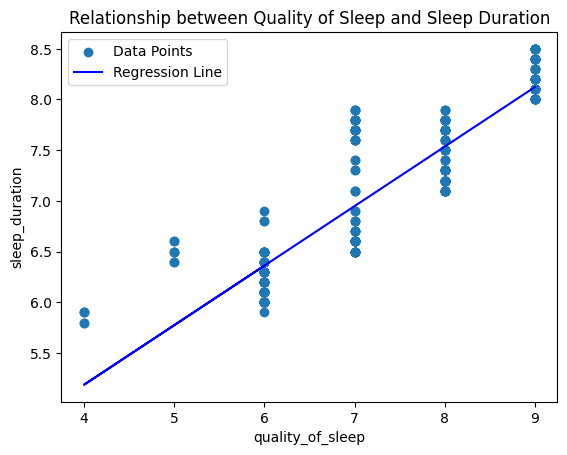

In [308]:
plt.scatter(df2['quality_of_sleep'], df2['sleep_duration'], label='Data Points')
plt.plot(df2['quality_of_sleep'], model.predict(x), color='blue', label='Regression Line')
plt.xlabel('quality_of_sleep')
plt.ylabel('sleep_duration')
plt.title('Relationship between Quality of Sleep and Sleep Duration')
plt.legend()
plt.show()